In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from astropy.io import fits

Import the library of radial profile objects and functions

In [3]:
import radprofile as rp

In terminal, I did the following:

```
ciao
download_chandra_obsid 3392 evt2
```

In [4]:
filename = "3392/primary/acisf03392N003_evt2.fits.gz"

To make a radial profile from the raw evt2 file, we need to get the `x` and `y` values from the events list, and measure the distance to the point source center (at coordinate `x0`, `y0`)

In [5]:
# edit this field with the appropriate coordinates
x0, y0 = 4090.5, 4090.5

In [6]:
evt_data = fits.open(filename)[1].data

x = evt_data['x']
y = evt_data['y']
r = np.sqrt((x - x0)**2 + (y - y0)**2)

How to figure out the units

In [7]:
x_unit = evt_data.columns['x'].unit
y_unit = evt_data.columns['y'].unit
print(x_unit, y_unit)

pixel pixel


You can use matplotlib to plot the histogram, which might help you decide how to set up the radial profile.  Play around with the `plt.hist` settings.

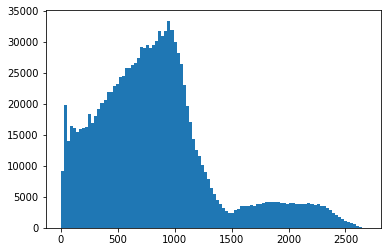

In [8]:
NBINS = 100
_ = plt.hist(r, NBINS)

Now you can use `np.histogram` to store that information and make it into a `RadProfile` object.

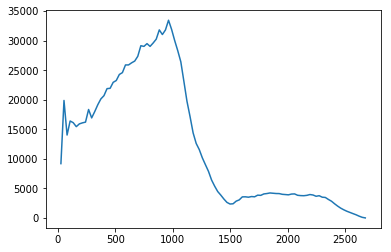

In [9]:
my_hist, my_hist_edges = np.histogram(r, NBINS)
plt.plot(my_hist_edges[1:], my_hist)

Load just the "edges" of the radial profile

In [10]:
my_rp = rp.RadProfile()
my_rp.rleft  = my_hist_edges[:-1]
my_rp.rright = my_hist_edges[1:]
my_rp.r_unit = x_unit

There is a built in `RadProfile.area` function that calculates the area of each annulus.  Use this to get calculate the surface brightness (counts per square pixel).

In [11]:
my_rp.value = my_hist / my_rp.area
my_rp.value_unit = 'counts/%s**2' % my_rp.r_unit

Because we are counting events, we can use counting statistics ($\sqrt(N)$) to get the error bars

In [12]:
my_rp.value_err = np.sqrt(my_hist) / my_rp.area

Now plot the whole thing

Text(0,0.5,'counts/pixel**2')

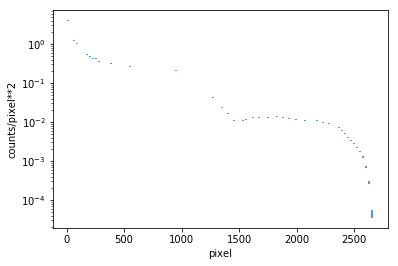

In [13]:
plt.errorbar(my_rp.rmid, my_rp.value, yerr=my_rp.value_err, ls='')
plt.semilogy()
plt.xlabel(my_rp.r_unit)
plt.ylabel(my_rp.value_unit)

## Play with it!

Change the way you plot or visualize the data

Can you make a function that makes `my_rp` from beginning to end? What inputs should it take? What will it output?

## For next time

We will learn how to load a `RadProfile` object from a FITS file output by CIAO `dmextract`